In [15]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import sys
import tempfile

from sklearn import svm, metrics
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import random


In [2]:
data_dir = '/tmp/tensorflow/mnist/input_data'
mnist = input_data.read_data_sets(data_dir, one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/tensorflow/mnist/input_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/tensorflow/mnist/input_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/tensorflow/mnist/input_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/tensorflow/mnist/input_data/t10k-labels-idx1-ubyte.gz

In [3]:
from sklearn.externals import joblib
clf = joblib.load('../models_examples/sk_mnist/train/data/models/mnist_svm_0_0/SVM.pkl')

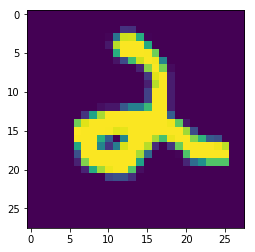

[2]


In [28]:
test_index = random.randint(0, test_data.shape[0]-1)
plt.imshow(test_data[test_index].reshape((28,28))); plt.show()
test_samples = test_data[test_index].reshape((1,784))
predicted = clf.predict(test_samples)
print(predicted)